In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
tris_data = pd.read_csv('Data/copy_tris_bag_rinse_experiment_20190528.csv', parse_dates = [1])
tris_data.head(10)

,Date,Sample,Rinses,pH
0,28-Feb-19,CRM 175,NaN,7.842533
1,28-Feb-19,CRM 175,NaN,7.843866
2,28-Feb-19,Tris_bottle batch 9,5.0,8.257798
3,28-Feb-19,Tris_bottle batch 9,5.0,8.257806
4,28-Feb-19,Tris_bottle batch 9,5.0,8.258061
5,28-Feb-19,Tris_bag 1,6.0,8.256000
6,28-Feb-19,Tris_bag 1,6.0,8.256326
7,28-Feb-19,Tris_bag 1,6.0,8.255999
8,28-Feb-19,Tris_bag 2,7.0,8.256671
9,28-Feb-19,Tris_bag 2,7.0,8.255715


In [29]:
tris_only = tris_data.dropna(axis = 0) # get rid of non-rinsed samples (CRM)
tris_only.head(20)

,Date,Sample,Rinses,pH
2,28-Feb-19,Tris_bottle batch 9,5.0,8.257798
3,28-Feb-19,Tris_bottle batch 9,5.0,8.257806
4,28-Feb-19,Tris_bottle batch 9,5.0,8.258061
5,28-Feb-19,Tris_bag 1,6.0,8.256000
6,28-Feb-19,Tris_bag 1,6.0,8.256326
7,28-Feb-19,Tris_bag 1,6.0,8.255999
8,28-Feb-19,Tris_bag 2,7.0,8.256671
9,28-Feb-19,Tris_bag 2,7.0,8.255715
10,28-Feb-19,Tris_bag 2,7.0,8.256935
11,28-Feb-19,Tris_bag 3,8.0,8.256126


In [32]:
tris_sample_groups = tris_only.groupby(by = ['Date', 'Sample'])
tris_sample_groups

In [33]:
tris_sample_avg = tris_sample_groups.mean()
tris_sample_avg

Rinses        pH
Date      Sample                               
1-Apr-19  Tris_bag 1              6.0  8.255942
          Tris_bag 2              7.0  8.255612
          Tris_bag 3              8.0  8.255755
          Tris_bag 4              9.0  8.255732
          Tris_bottle batch 9     7.5  8.257215
14-May-19 Tris_bag 1              6.0  8.255052
          Tris_bag 2              7.0  8.255968
          Tris_bag 3              8.0  8.254611
          Tris_bag 4              9.0  8.254407
          Tris_bottle batch 9     7.5  8.257236
28-Feb-19 Tris_bag 1              6.0  8.256108
          Tris_bag 2              7.0  8.256440
          Tris_bag 3              8.0  8.256141
          Tris_bag 4              9.0  8.256078
          Tris_bottle batch 9     7.5  8.257449

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


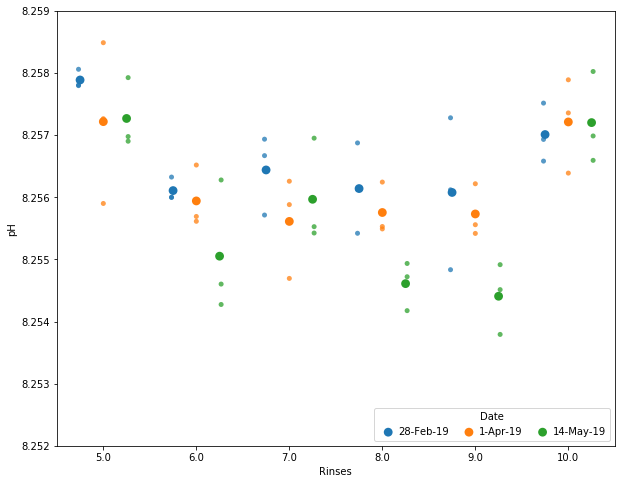

In [68]:
fig, ax = plt.subplots(figsize = (10, 8))
ax = sns.stripplot(x="Rinses", y="pH", hue = 'Date', data=tris_only, dodge = True, alpha = 0.75)
ax = sns.pointplot(x="Rinses", y="pH", hue = 'Date', data=tris_only, dodge = 0.5, join = False, ci = None)
ax.set_ylim([8.252, 8.259])

# Make new labels from Sample and Rinses cols
tris_only['new_labels'] = tris_only['Sample']+str(tris_only['Rinses'])

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Date",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

plt.savefig('Tris-rinse-exp.png')

In [66]:
tris_only['new_labels']

2     Tris_bottle batch 92      5.0\n3      5.0\n4  ...
3     Tris_bottle batch 92      5.0\n3      5.0\n4  ...
4     Tris_bottle batch 92      5.0\n3      5.0\n4  ...
5     Tris_bag 12      5.0\n3      5.0\n4      5.0\n...
6     Tris_bag 12      5.0\n3      5.0\n4      5.0\n...
7     Tris_bag 12      5.0\n3      5.0\n4      5.0\n...
8     Tris_bag 22      5.0\n3      5.0\n4      5.0\n...
9     Tris_bag 22      5.0\n3      5.0\n4      5.0\n...
10    Tris_bag 22      5.0\n3      5.0\n4      5.0\n...
11    Tris_bag 32      5.0\n3      5.0\n4      5.0\n...
12    Tris_bag 32      5.0\n3      5.0\n4      5.0\n...
13    Tris_bag 32      5.0\n3      5.0\n4      5.0\n...
14    Tris_bag 42      5.0\n3      5.0\n4      5.0\n...
15    Tris_bag 42      5.0\n3      5.0\n4      5.0\n...
16    Tris_bag 42      5.0\n3      5.0\n4      5.0\n...
17    Tris_bottle batch 92      5.0\n3      5.0\n4  ...
18    Tris_bottle batch 92      5.0\n3      5.0\n4  ...
19    Tris_bottle batch 92      5.0\n3      5.0\

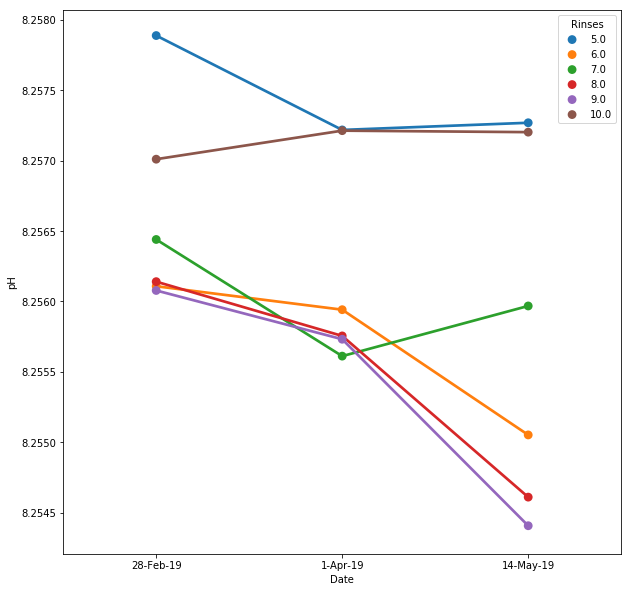

In [81]:
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.pointplot(x="Date", y = 'pH', hue = 'Rinses', data=tris_only, dodge = False, alpha = 0.75, ci = None)

# ax.legend(handles[3:], labels[3:], title="Date",
#           handletextpad=0, columnspacing=1,
#           loc="lower right", ncol=3, frameon=True)

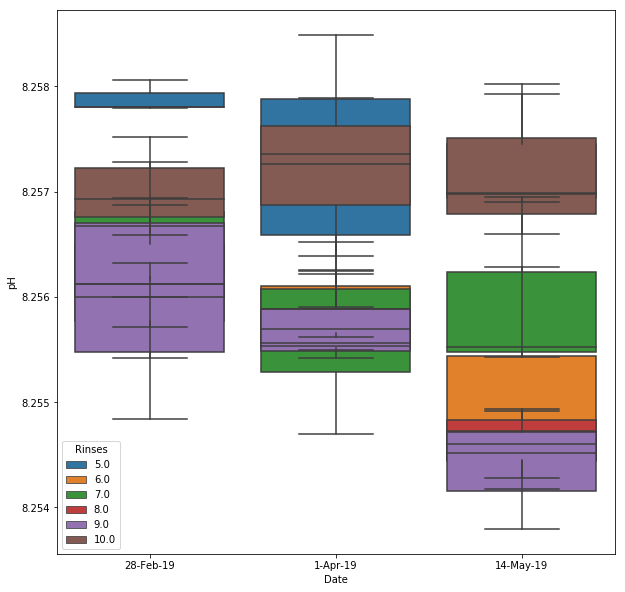

In [84]:
fig, ax = plt.subplots(figsize = (10, 10))
ax = sns.boxplot(x="Date", y = 'pH', hue = 'Rinses', data=tris_only, dodge = False)
